In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.util import invert
from scipy.spatial import distance
import os
import PIL
from PIL import Image, ImageDraw
import math
from IPython.display import clear_output
from scipy import stats
from scipy.spatial import ConvexHull, convex_hull_plot_2d

https://theailearner.com/tag/convex-hull-opencv/

In [2]:
def convex_cv_v(img_cv):
    img_cv = invert(img_cv)
    gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            if(gray[i,j]>50):
                gray[i,j]=255

    # Find the contours in the image 
    ret, thresh = cv2.threshold(gray, 50, 255,0)
    contours, hierarchy = cv2.findContours(thresh, 2, 1) 
    cnt = contours[0]
    # hull = []
    # for i in range(len(cnt)):
    #     hull.append(cv2.convexHull(cnt))
    hull = cv2.convexHull(cnt,returnPoints=False,clockwise=False)

    defects = cv2.convexityDefects(cnt,hull)
    
    
    return hull,contours,gray,defects

In [3]:
path = './images/flash_labels'
dir = os.listdir(path)
epsilon = 15000
cpt = 0
for file in dir:
    str_file = path + '/' + file
    img = cv2.imread(str_file)
    hull,contour,gray,defects = convex_cv_v(img)
    cnt = contour[0]
    for i in range(defects.shape[0]):
        s,e,f,d = defects[i,0]
        start = tuple(cnt[s][0])
        end = tuple(cnt[e][0])
        far = tuple(cnt[f][0])
        if d>epsilon:
            cv2.circle(img,far,5,[0,0,255],-1)
    plt.figure(cpt)
    plt.imshow(img)
    cpt+=1
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './images/flash_labels'

In [4]:
def centre_gravité(cnt):
    sum_x = 0
    sum_y = 0
    for i in range(len(cnt)):
        sum_x += cnt[i][0][0]
        sum_y += cnt[i][0][1]

    centre_x = sum_x/len(cnt)
    centre_y = sum_y/len(cnt)
    return centre_x,centre_y

In [5]:
def outer_lock(outer_locks):
    # Calculate distances between each pair of points and store them in a dictionary
    distances = {}
    for i in range(len(outer_locks)):
        for j in range(i+1, len(outer_locks)):
            distances[(i, j)] = distance.euclidean(outer_locks[i], outer_locks[j])

    # Sort the distances dictionary by values
    sorted_distances = sorted(distances.items(), key=lambda x: x[1])

    # Initialize a list to store the sorted points
    sorted_points = []

    # Iterate through the sorted distances and append the corresponding points to the sorted list
    cpt = 0
    for pair in sorted_distances:
        if cpt*2 == len(outer_locks):
            break; 
        sorted_points.append([outer_locks[pair[0][0]],outer_locks[pair[0][1]]])
        cpt+=1

    print("initial points : ",outer_locks)
    print("outer locks : ",sorted_points)
    return sorted_points

In [6]:
def corner_or_border(inner_locks,outer_locks):
    if len(inner_locks)+len(outer_locks)==2:
        print("corner")
    elif len(inner_locks)+len(outer_locks)==3:
        print("border")
    else:
        print("middle")

In [7]:
img = cv2.imread('b_14.jpg')
# img = cv2.imread('./images/label_dataset_4x4.png')
hull,contour,gray,defects = convex_cv_v(img)
cnt = contour[0]

In [8]:
print(hull)

[[2093]
 [2087]
 [2075]
 [1855]
 [1853]
 [1852]
 [1848]
 [1833]
 [1714]
 [1441]
 [1413]
 [1393]
 [1366]
 [1359]
 [1355]
 [1351]
 [1344]
 [1103]
 [1091]
 [1086]
 [1083]
 [1078]
 [1069]
 [1061]
 [1052]
 [ 794]
 [ 793]
 [ 790]
 [ 788]
 [ 783]
 [ 780]
 [ 752]
 [ 741]
 [ 736]
 [ 725]
 [ 707]
 [ 699]
 [ 422]
 [ 415]
 [ 284]
 [ 276]
 [ 270]
 [ 268]
 [  36]
 [  28]
 [  23]
 [  15]
 [   4]
 [   0]]


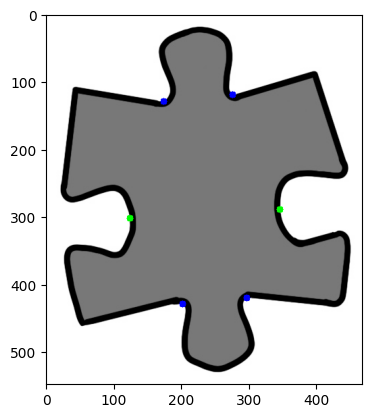

In [11]:
epsilon = 15000
inner_locks = []
outer_locks = []
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    if d>epsilon and d<25000:
        outer_locks.append(far)
        cv2.circle(img,far,5,[0,0,255],-1)
    if d>25000:
        inner_locks.append(far)
        cv2.circle(img,far,5,[0,255,0],-1)

plt.imshow(img)


In [12]:
sorted_points = outer_lock(outer_locks)

initial points :  [(174, 129), (202, 429), (297, 420), (276, 119)]
outer locks :  [[(202, 429), (297, 420)], [(174, 129), (276, 119)]]


In [13]:
print(len(sorted_points))
print(len(sorted_points[0]))
print(sorted_points[0][0][0])
corner_or_border(inner_locks,sorted_points)

2
2
202
middle


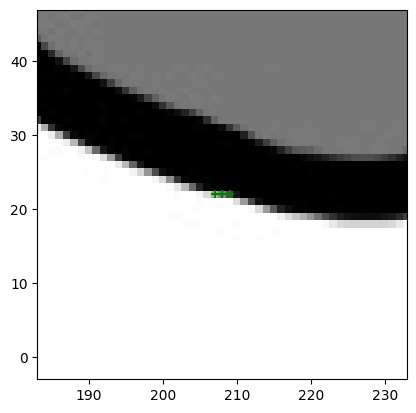

Prochain i: -1


In [15]:
i = 10
precision = 25
while(True):
    plt.imshow(img)
    plt.scatter(cnt[i-1][0][0],cnt[i-1][0][1],c='green',marker='+')
    plt.scatter(cnt[i][0][0],cnt[i][0][1],c='green',marker='+')
    plt.scatter(cnt[i+1][0][0],cnt[i+1][0][1],c='green',marker='+')
    plt.axis([cnt[i][0][0]-precision, cnt[i][0][0]+precision, cnt[i][0][1]-precision, cnt[i][0][1]+precision])

    clear_output(wait=True)
    plt.show()

    i = int(input("Prochain i:"))
    if i == -1:
        break

array([[ 1.        , -0.75150868],
       [-0.75150868,  1.        ]])

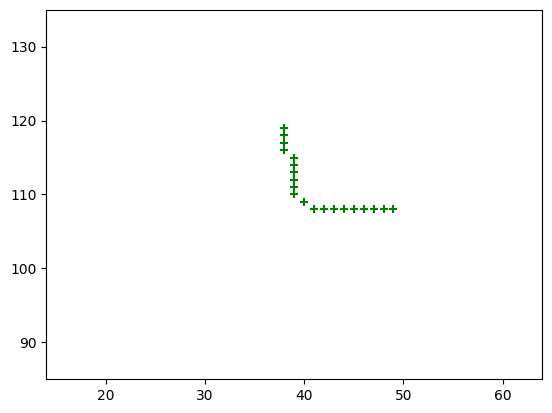

In [16]:
i=270
precision = 25
plt.scatter(cnt[i-10:i+10,0,0],cnt[i-10:i+10,0,1],c='green',marker='+')
plt.axis([cnt[i][0][0]-precision, cnt[i][0][0]+precision, cnt[i][0][1]-precision, cnt[i][0][1]+precision])
np.corrcoef(cnt[i-10:i+10,0,0],cnt[i-10:i+10,0,1])

array([[1.        , 0.88883777],
       [0.88883777, 1.        ]])

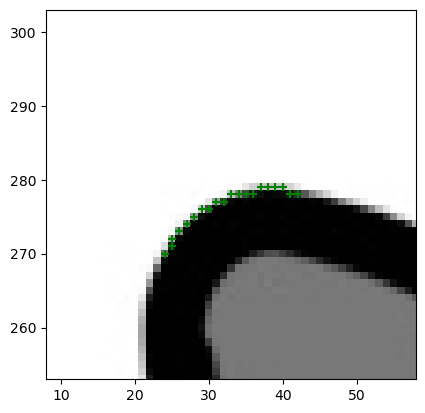

In [ ]:
i=440
precision = 25
plt.imshow(img)
plt.scatter(cnt[i-10:i+10,0,0],cnt[i-10:i+10,0,1],c='green',marker='+')
plt.axis([cnt[i][0][0]-precision, cnt[i][0][0]+precision, cnt[i][0][1]-precision, cnt[i][0][1]+precision])
np.corrcoef(cnt[i-10:i+10,0,0],cnt[i-10:i+10,0,1])

[[ 1.         -0.75150868]
 [-0.75150868  1.        ]]


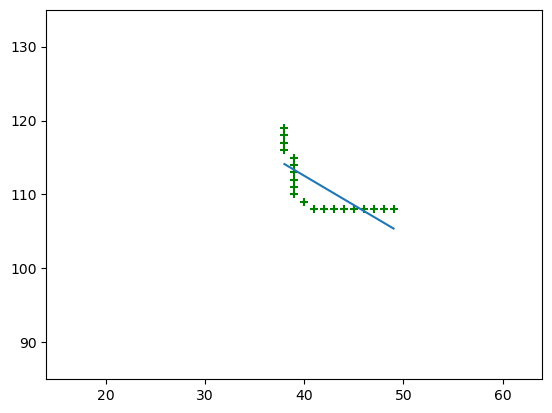

In [ ]:
i=270
precision = 25
X = cnt[i-10:i+10,0,0]
Y = cnt[i-10:i+10,0,1]
beta_1 = np.sum((Y - np.average(Y))*(X - np.average(X))) / np.sum((X-np.average(X))*(X-np.average(X)))
beta_0 = np.average(Y) - beta_1 * np.average(X)
Y_hat = [beta_0 + beta_1 * X[i] for i in range(len(X))]
print(np.corrcoef(cnt[i-10:i+10,0,0],cnt[i-10:i+10,0,1]))
plt.scatter(cnt[i-10:i+10,0,0],cnt[i-10:i+10,0,1],c='green',marker='+')
plt.axis([cnt[i][0][0]-precision, cnt[i][0][0]+precision, cnt[i][0][1]-precision, cnt[i][0][1]+precision])
plt.plot(X, Y_hat)

In [ ]:
X = cnt[i-10:i+10,0,0]
Y = cnt[i-10:i+10,0,1]
mat = np.corrcoef(X,Y)
print(mat)
print(mat[0,1])
print(mat[1,0])

[[ 1.         -0.75150868]
 [-0.75150868  1.        ]]
-0.7515086840808203
-0.7515086840808203


In [ ]:
def box(X, Y):
    return np.min(X), np.max(X), np.min(Y), np.max(Y)

In [ ]:
def box_y_ratio(X, Y):
    minx, maxx, miny, maxy = box(X,Y)
    return (maxx-minx)/(maxy-miny)

[[1.         0.82052485]
 [0.82052485 1.        ]]


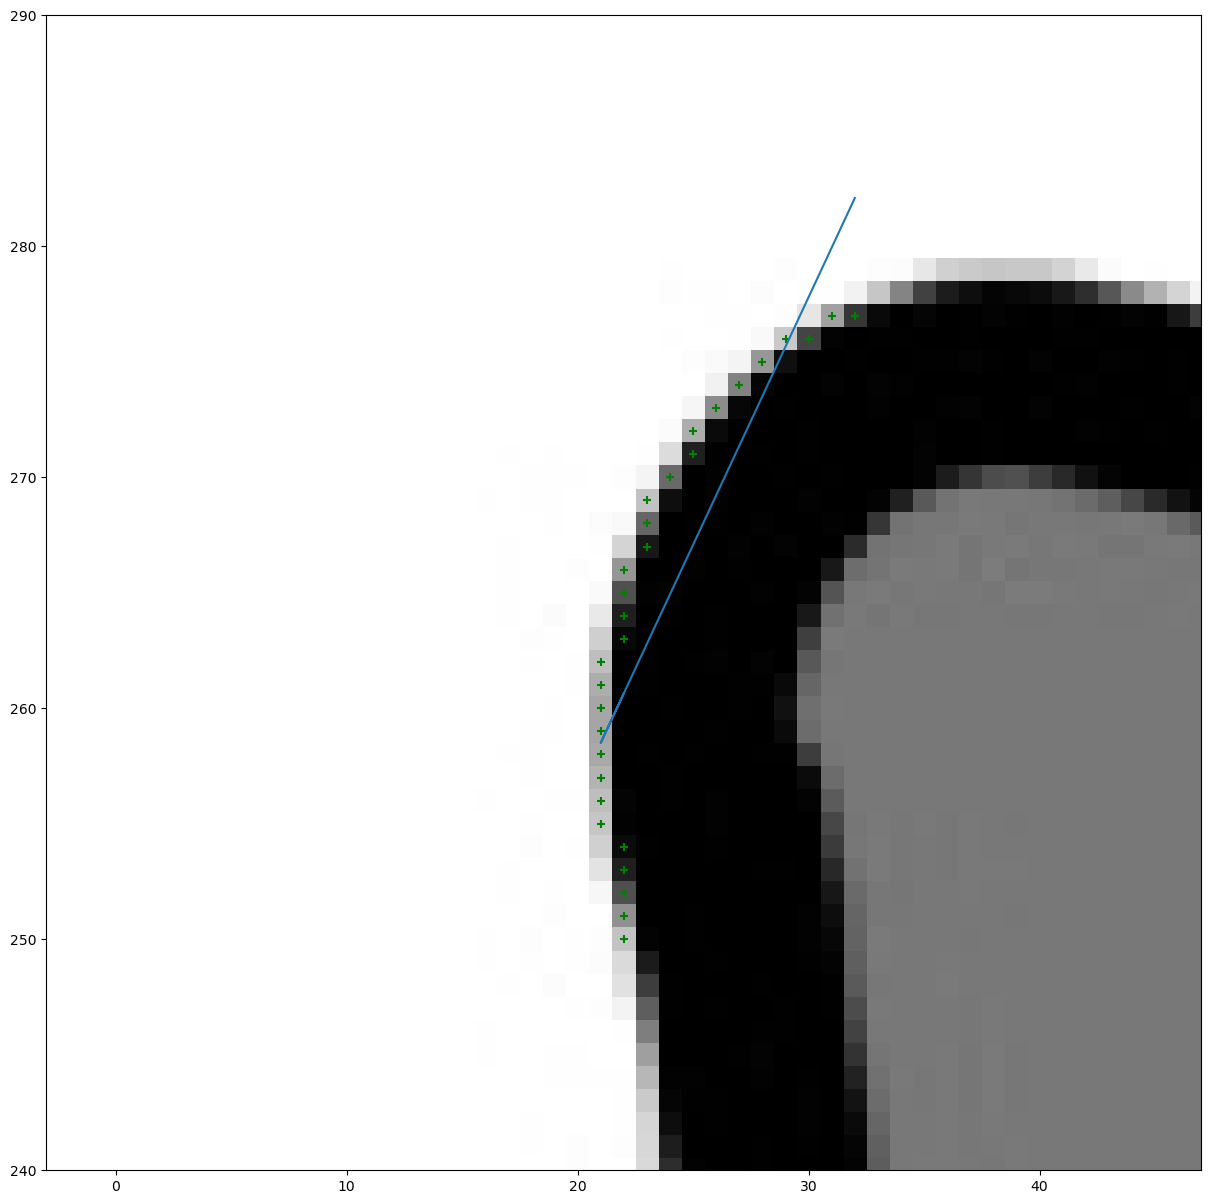

(0.007031190992144491, 63)
(0.030982694252074963, 143)
(0.03176686313445596, 260)
(0.0501051835163639, 417)


In [ ]:
min1 = (1,-1)
min2 = (1,-1)
min3 = (1,-1)
min4 = (1,-1)

size = 15

for i in range(size,len(cnt)-size):
    X = cnt[i-size:i+size,0,0]
    Y = cnt[i-size:i+size,0,1]

    mat = np.corrcoef(X,Y)

    val = np.abs(mat[0,1])
    if val < min1[0]:
        min1=(val,i)
    elif val<min2[0]:
        min2 = (val,i)
    elif val<min3[0]:
        min3 = (val,i)
    elif val<min4[0]:
        min4 = (val,i)

    box_ratio = box_y_ratio(X, Y)
    if box_ratio<0.3:
        continue
    if box_ratio>0.9:
        continue

    if val<1:
        plt.figure(1, figsize=(20,15))
        beta_1 = np.sum((Y - np.average(Y))*(X - np.average(X))) / np.sum((X-np.average(X))*(X-np.average(X)))
        beta_0 = np.average(Y) - beta_1 * np.average(X)
        Y_hat = [beta_0 + beta_1 * X[i] for i in range(len(X))]
        print(mat)
        plt.imshow(img)
        plt.scatter(X,Y,c='green',marker='+')
        plt.axis([cnt[i][0][0]-precision, cnt[i][0][0]+precision, cnt[i][0][1]-precision, cnt[i][0][1]+precision])
        plt.plot(X, Y_hat)
        plt.show()
        char = input("Press enter")
        if char=="e":
            break
        clear_output(wait=True)

print(min1)
print(min2)
print(min3)
print(min4)

In [ ]:
X

array([215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
       202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190,
       189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177,
       176, 175, 174, 173, 172, 171, 171, 170, 169, 169, 168, 168, 168,
       167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167,
       168, 168, 168, 168, 168], dtype=int32)

In [ ]:




X + 1

array([216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204,
       203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191,
       190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178,
       177, 176, 175, 174, 173, 172, 172, 171, 170, 170, 169, 169, 169,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       169, 169, 169, 169, 169], dtype=int32)

R:  0.8291039067985038
P:  1.730660471364325e-26
err:  0.23397735306302186


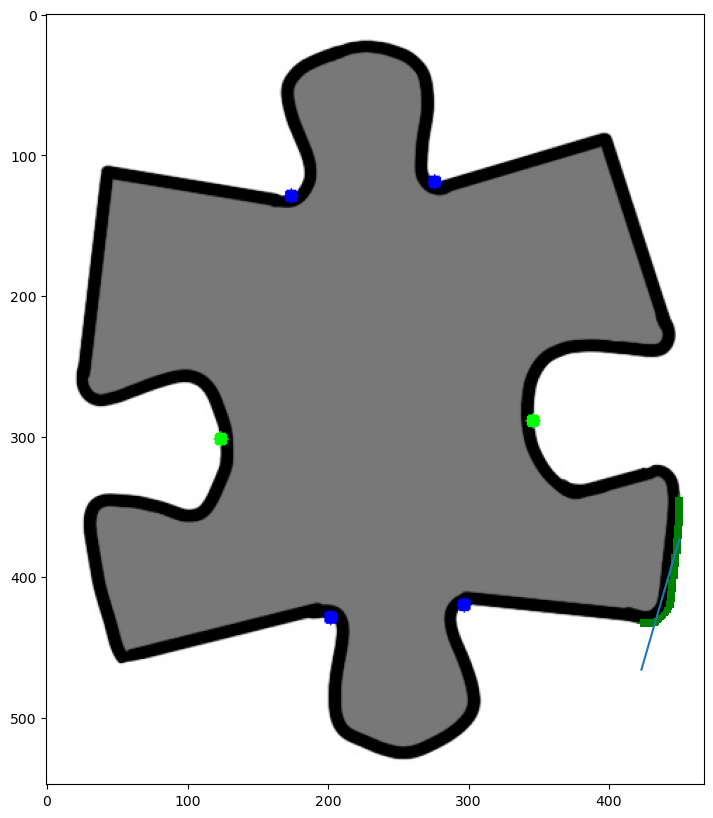

(0.002486158721796608, 1187)
(0.010829288606941332, 1150)
(0.030291226044591325, 110)
(0.035171750338214444, 1186)


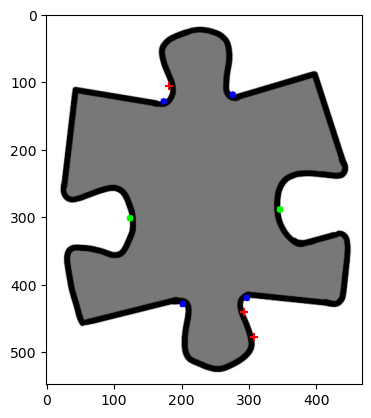

In [ ]:
min1 = (1,-1)
min2 = (1,-1)
min3 = (1,-1)
min4 = (1,-1)

size = 50

precision= 50
for i in range(size,len(cnt)-size):
    X = cnt[i-size:i+size,0,0]
    Y = cnt[i-size:i+size,0,1]
    
    #X = np.concatenate([X, X+1, X+2, X+3, X+4, X+5, X+6, X+7])
    #Y = np.concatenate([Y, Y, Y, Y, Y, Y, Y, Y])

    mask = X == X[0]
    if mask.all() == True:
        print("all true")
        continue

    box_ratio = box_y_ratio(X, Y)
    if box_ratio<0.1:
        continue
    if box_ratio>0.7:
        continue

    slope, intercept, R, P, err = stats.linregress(X,Y)
    R = np.abs(R)

    if R < min1[0]:
        min1=(R,i)
    elif R<min2[0]:
        min2 = (R,i)
    elif R<min3[0]:
        min3 = (R,i)
    elif R<min4[0]:
        min4 = (R,i)

    if R<0.50 or (R>0.8 and R<0.9):
        plt.figure(1, figsize=(15,10))
        #print(X)
        #print(Y)
        print("R: ", R)
        print("P: ", P)
        print("err: ", err)
        plt.imshow(img)
        plt.scatter(X,Y,c='green',marker='+')
        #plt.axis([cnt[i][0][0]-precision, cnt[i][0][0]+precision, cnt[i][0][1]-precision, cnt[i][0][1]+precision])
        fitline = slope * X + intercept
        #fitline.head()
        plt.plot(X, fitline)
        plt.show()
        char = input("Press enter")
        if char=="e":
            break
        clear_output(wait=True)

print(min1)
print(min2)
print(min3)
print(min4)

plt.imshow(img)
plt.scatter(cnt[min1[1],0,0], cnt[min1[1],0,1],c='red',marker='+')
plt.scatter(cnt[min2[1],0,0], cnt[min2[1],0,1],c='red',marker='+')
plt.scatter(cnt[min3[1],0,0], cnt[min3[1],0,1],c='red',marker='+')
plt.scatter(cnt[min4[1],0,0], cnt[min4[1],0,1],c='red',marker='+')

In [ ]:
hull = ConvexHull(cnt)

In [ ]:
input("test")

''

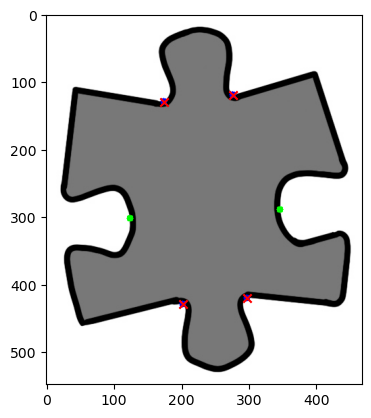

In [ ]:
plt.imshow(img)
for i in range(len(sorted_points)):
    for j in range(len(sorted_points[i])):
        plt.scatter(sorted_points[i][j][0],sorted_points[i][j][1],c='red',marker='x')

plt.show()

In [ ]:
print(sorted_points[0])
print(sorted_points[1])

[(202, 429), (297, 420)]
[(174, 129), (276, 119)]


In [ ]:
centre_x,centre_y = centre_gravité(cnt)
new_img = PIL.Image.fromarray(img)
angle_rad = math.atan2((new_img.width/2)-centre_y,(new_img.height/2)-centre_x)
angle_deg = math.degrees(angle_rad)

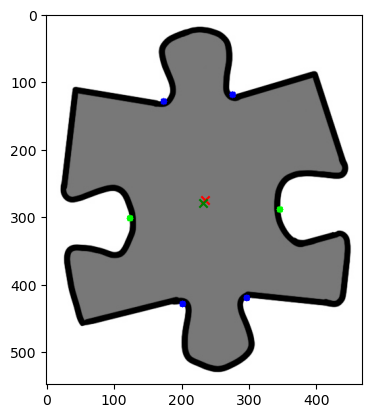

In [ ]:
new_img = PIL.Image.fromarray(img)

plt.imshow(img)
# plt.plot([468/2,468/2],[0,520],'r-',lw=2)
# plt.plot([0,468],[548/2,548/2],'r-',lw=2)
# #plt.plot([inner_locks[0][0],inner_locks[1][0]],[inner_locks[0][1],inner_locks[1][1]],'r-',lw=2)
# plt.plot([sorted_points[0][0][0],sorted_points[1][1][0]],[sorted_points[0][0][1],sorted_points[1][1][1]],'b-',lw=2)
# plt.plot([sorted_points[0][1][0],sorted_points[1][0][0]],[sorted_points[0][1][1],sorted_points[1][0][1]],'b-',lw=2)
plt.scatter(new_img.width/2,new_img.height/2,c='red',marker='x')
plt.scatter(centre_x,centre_y,c='green',marker='x')
# plt.plot([new_img.width/2,new_img.width/2],[0,new_img.height],'r-',lw=2)
# plt.plot([0,new_img.width],[new_img.height/2,new_img.height/2],'r-',lw=2)
plt.show()

# rotated_img = new_img.rotate(angle_rad-2,fillcolor='white',expand=0)
# rotated_arr = np.array(rotated_img)
# hull2,contour2,gray2,defects2 = convex_cv_v(rotated_arr)
# cnt2 = contour2[0]
# new_centre_x,new_centre_y = centre_gravité(cnt2)
# plt.imshow(rotated_img)
# plt.scatter(new_img.width/2,new_img.height/2,c='red',marker='x')
# plt.scatter(new_centre_x,new_centre_y,c='green',marker='x')
# # plt.plot([new_img.width/2,new_img.width/2],[0,new_img.height],'r-',lw=2)
# # plt.plot([0,new_img.width],[new_img.height/2,new_img.height/2],'r-',lw=2)
# plt.show()


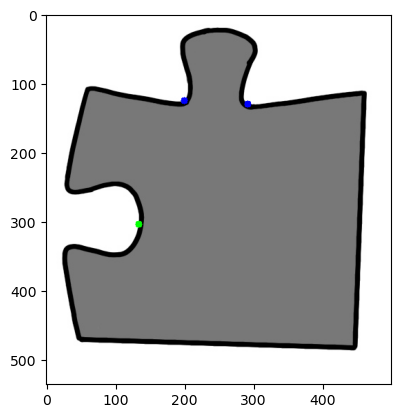

In [ ]:
img = cv2.imread('./images/flash_labels/b_17.jpg')
hull,contour,gray,defects = convex_cv_v(img)
cnt = contour[0]
epsilon = 15000
inner_locks = []
outer_locks = []
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    if d>epsilon and d<25000:
        outer_locks.append(far)
        cv2.circle(img,far,5,[0,0,255],-1)
    if d>25000:
        inner_locks.append(far)
        cv2.circle(img,far,5,[0,255,0],-1)

plt.imshow(img)

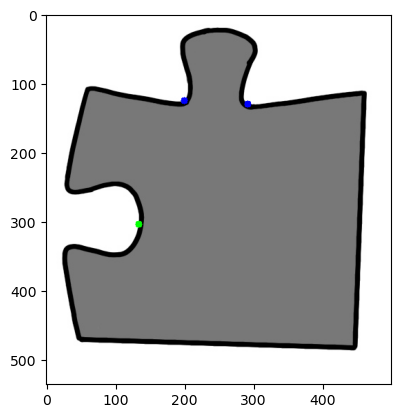

In [ ]:
new_img = PIL.Image.fromarray(img)
rotated_img = new_img.rotate(0)
plt.imshow(rotated_img)
plt.show()

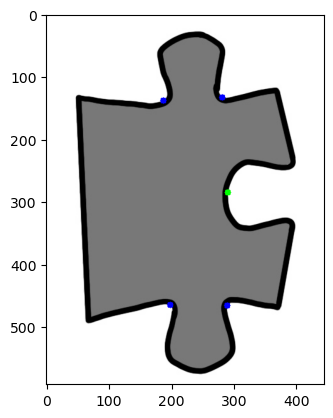

In [ ]:
img2 = cv2.imread('./images/flash_labels/b_12.jpg')
hull2,contour2,gray2,defects2 = convex_cv_v(img2)
cnt2 = contour2[0]
epsilon = 15000
inner_locks_2 = []
outer_locks_2 = []
for i in range(defects2.shape[0]):
    s,e,f,d = defects2[i,0]
    start = tuple(cnt2[s][0])
    end = tuple(cnt2[e][0])
    far = tuple(cnt2[f][0])
    if d>epsilon and d<25000:
        outer_locks_2.append(far)
        cv2.circle(img2,far,5,[0,0,255],-1)
    if d>25000:
        inner_locks_2.append(far)
        cv2.circle(img2,far,5,[0,255,0],-1)



new_img2 = PIL.Image.fromarray(img2)
# centre_x,centre_y = centre_gravité(cnt2)
# new_img = PIL.Image.fromarray(img)
# angle_rad = math.atan2((new_img.width/2)-centre_y,(new_img.height/2)-centre_x)
rotated_img2 = new_img2.rotate(0,fillcolor='white',expand=0)
plt.imshow(rotated_img2)
plt.show()

In [ ]:
def alpha_test(arr):
    w,h,c = arr.shape
    for j in range(h):
        for i in range(w):
            if arr[i][j][0]>=235 and arr[i][j][1]>=235 and arr[i][j][2]>=235:
                arr[i][j][3]=0
    return arr

In [ ]:
sorted_1 =outer_lock(outer_locks)
sorted_2 =outer_lock(outer_locks_2)
#print(sorted_1[0])
dist1 = abs(sorted_1[0][0][0]-sorted_1[0][1][0])/2
dist2 = abs(sorted_1[0][0][0]-sorted_1[0][1][0])/2

print(inner_locks_2)


initial points :  [(200, 125), (292, 130)]
outer locks :  [[(200, 125), (292, 130)]]
initial points :  [(187, 138), (198, 465), (289, 466), (281, 133)]
outer locks :  [[(198, 465), (289, 466)], [(187, 138), (281, 133)]]
[(290, 285)]
excroi =  ['bas', 'haut']
creux =  ['bas']


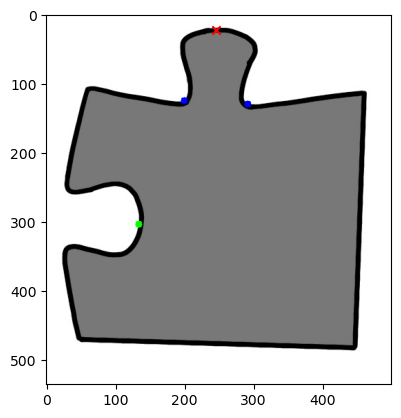

In [ ]:
plt.imshow(rotated_img)
plt.scatter(min(sorted_1[0][0][0],sorted_1[0][1][0])+dist1,max(sorted_1[0][0][1],sorted_1[0][1][1])-dist1*2.35,c='red',marker='x')
plt.show()

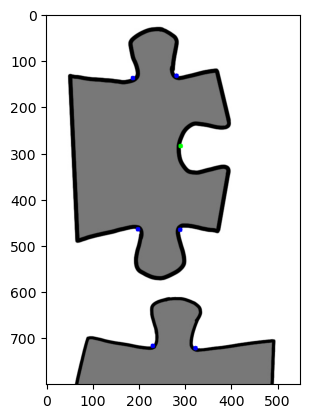

In [ ]:

canvas = PIL.Image.new('RGB', (550, 800),'white')

arr = np.array(rotated_img.convert("RGBA"))
arr = alpha_test(arr)

arr2 = np.array(rotated_img2.convert("RGBA"))
arr2 = alpha_test(arr2)

new_im = PIL.Image.fromarray(arr).convert("RGBA")
new_im2 = PIL.Image.fromarray(arr2).convert("RGBA")

canvas.paste(new_im2)
canvas.paste(new_im,(30,new_im2.size[1]),new_im)
plt.imshow(canvas)

In [15]:
cnt

array([[[218,  19]],

       [[217,  20]],

       [[216,  20]],

       ...,

       [[221,  19]],

       [[220,  19]],

       [[219,  19]]], dtype=int32)

In [14]:
np.reshape(cnt, (2112, 2))

array([[218,  19],
       [217,  20],
       [216,  20],
       ...,
       [221,  19],
       [220,  19],
       [219,  19]], dtype=int32)